In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
path_train = '/home/ngoc/work/data/titanic/train.csv'
path_test = '/home/ngoc/work/data/titanic/test.csv'
label = '/home/ngoc/work/data/titanic/gender_submission.csv'
data = pd.read_csv(path_train)
test = pd.read_csv(path_test)
# test.head()

In [3]:
label = pd.read_csv(label)

In [4]:
labels = label['Survived']

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
data['Survived'].unique()

array([0, 1])

In [11]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [12]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

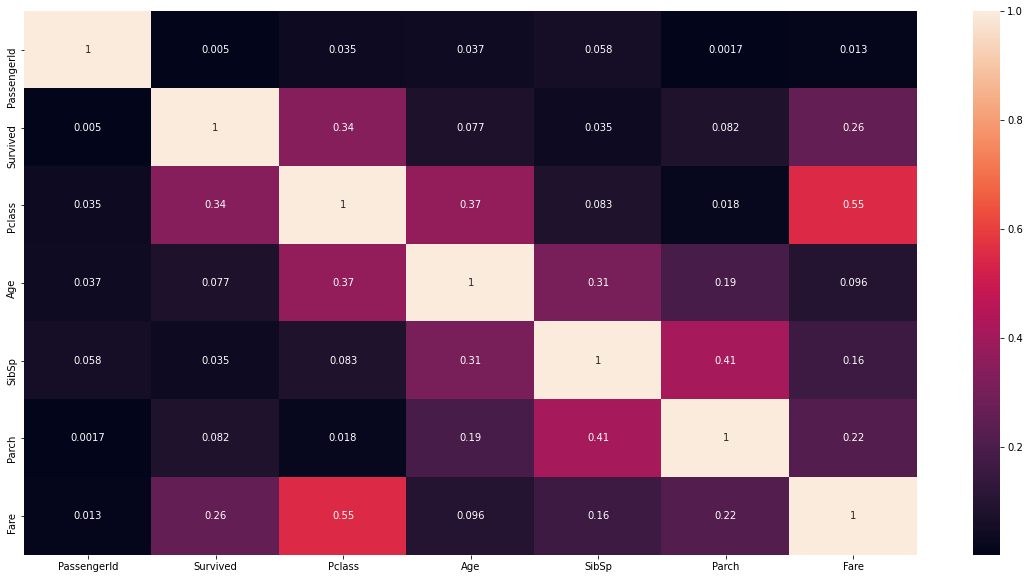

In [13]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True);


In [19]:
train_data=data[['Pclass','Sex','SibSp','Parch','Embarked','Age','Survived']]
test_data = test[['Pclass','Sex','SibSp','Parch','Embarked','Age']]

In [20]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
train_data=train_data.drop_duplicates()
# test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
# test_data=test_data.drop_duplicates()

In [21]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
train_data['Age_Binned'] = pd.cut(train_data['Age'], bins=bins,labels=labels)
test_data['Age_Binned'] = pd.cut(test_data['Age'], bins=bins,labels=labels)


In [22]:
#encoding gender column
enc_sex= preprocessing.LabelEncoder()
enc_embarked = preprocessing.LabelEncoder()
train_data['Sex']=enc_sex.fit_transform(train_data['Sex'].tolist())
train_data['Embarked']=enc_embarked.fit_transform(train_data['Embarked'].tolist())

test_data['Sex']=enc_sex.fit_transform(test_data['Sex'].tolist())
test_data['Embarked']=enc_embarked.fit_transform(test_data['Embarked'].tolist())

In [24]:
train_data=train_data[['Pclass','Sex','SibSp','Parch','Embarked','Age_Binned','Survived']]
print(train_data)

     Pclass  Sex  SibSp  Parch  Embarked Age_Binned  Survived
0         3    1      1      0         2          2         0
1         1    0      1      0         0          3         1
2         3    0      0      0         2          2         1
3         1    0      1      0         2          3         1
4         3    1      0      0         2          3         0
..      ...  ...    ...    ...       ...        ...       ...
885       3    0      0      5         1          3         0
887       1    0      0      0         2          1         1
888       3    0      1      2         2          2         0
889       1    1      0      0         0          2         1
890       3    1      0      0         1          3         0

[585 rows x 7 columns]


In [25]:
np_input_data=train_data.iloc[:,0:len(train_data.columns)-1].values

In [26]:
train_data
x = train_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Binned']]
y = train_data['Survived']

In [27]:
train_data

Pclass  Sex  SibSp  Parch  Embarked Age_Binned  Survived
0         3    1      1      0         2          2         0
1         1    0      1      0         0          3         1
2         3    0      0      0         2          2         1
3         1    0      1      0         2          3         1
4         3    1      0      0         2          3         0
..      ...  ...    ...    ...       ...        ...       ...
885       3    0      0      5         1          3         0
887       1    0      0      0         2          1         1
888       3    0      1      2         2          2         0
889       1    1      0      0         0          2         1
890       3    1      0      0         1          3         0

[585 rows x 7 columns]

In [28]:
# test_data.drop(columns = ['Age'],axis=1, inplace=True)
test_data

Pclass  Sex  SibSp  Parch  Embarked   Age Age_Binned
0         3    1      0      0         1  34.5          3
1         3    0      1      0         2  47.0          4
2         2    1      0      0         1  62.0          6
3         3    1      0      0         2  27.0          2
4         3    0      1      1         2  22.0          2
..      ...  ...    ...    ...       ...   ...        ...
413       3    1      0      0         2   NaN        NaN
414       1    0      0      0         0  39.0          3
415       3    1      0      0         2  38.5          3
416       3    1      0      0         2   NaN        NaN
417       3    1      1      1         0   NaN        NaN

[418 rows x 7 columns]

In [29]:
scaler =  MinMaxScaler()
np_input_data_scaled=scaler.fit_transform(np_input_data)

In [30]:
poly = PolynomialFeatures(3)
np_input_data_scaled=poly.fit_transform(np_input_data_scaled)

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
np_input_data_scaled=pca.fit_transform(np_input_data_scaled)

np_output_data=train_data.iloc[:,len(train_data.columns)-1].values

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(np_input_data_scaled, np_output_data)

X_train, X_test, y_train, y_test = train_test_split(np_input_data_scaled, np_output_data, test_size=0.1, random_state=42)

In [33]:
#Create a Gaussian Classifier
clf= RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Random Forest')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy F1:",metrics.f1_score(y_test, y_pred, average='macro'))



model = XGBClassifier()


model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('XGboost')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy F1:",metrics.f1_score(y_test, y_pred, average='macro'))


from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier( loss='deviance',n_estimators=100,learning_rate=0.1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('GradientBoosting')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy F1:",metrics.f1_score(y_test, y_pred, average='macro'))

Random Forest
Accuracy: 0.7796610169491526
Accuracy F1: 0.7701528318849267
XGboost
Accuracy: 0.7796610169491526
Accuracy F1: 0.7731440402247856
GradientBoosting
Accuracy: 0.7796610169491526
Accuracy F1: 0.7701528318849267
